<a href="https://colab.research.google.com/github/GULaiANALYST/ML-projects/blob/main/Sentimental_analysis_on_E_com_website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Reviews.csv")



In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
example = df [ 'Text'][50]
print (example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
nltk.download('punkt')
nltk.word_tokenize (example)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [ ]:
tokens=nltk.word_tokenize(example)
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged [:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk. chunk.ne_chunk (tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
from nltk. sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia =SentimentIntensityAnalyzer ()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores (example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len (df)):
    text = row['Text']
    myid = row['Id' ]
    res[myid] =sia.polarity_scores (text)

In [ ]:
vaders = pd.DataFrame (res). T
vaders = vaders.reset_index().rename (columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
from bs4 import BeautifulSoup
import requests


def get_reviews_from_website(url):
    # Function to fetch reviews from a website
    # (You may need to customize this based on the structure of the website)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    reviews = [review.text for review in soup.find_all('div', class_='description')]
    return reviews

def analyze_sentiment(review):
    # Function to analyze sentiment using SentimentIntensityAnalyzer
    sentiment_scores = sia.polarity_scores(review)
    return sentiment_scores

def main():
    # Website URL
    website_url = 'https://zevarhouse.com/product/starring-fashion-gold-coated-tops'

    # Fetch reviews from the website
    reviews = get_reviews_from_website(website_url)

    # Analyze sentiment for each review
    for i, review in enumerate(reviews, start=1):
        sentiment_scores = analyze_sentiment(review)
        print(f"Review: {review}")
        print(f" Sentiment Scores from SIA: {sentiment_scores}")
        print("\n" + "=" * 50 + "\n")

if __name__ == "__main__":
    main()


Review: Ordered a ring, and it fits like a dream. Happy customer!

 Sentiment Scores from SIA: {'neg': 0.0, 'neu': 0.414, 'pos': 0.586, 'compound': 0.8172}


Review: You can never have enough jewelry, especially from here.

 Sentiment Scores from SIA: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


Review: Shiny, beautiful, and reached in time, Recommended

 Sentiment Scores from SIA: {'neg': 0.0, 'neu': 0.36, 'pos': 0.64, 'compound': 0.7269}


Review: Jewelry shopping made easy, thanks to this online store.

 Sentiment Scores from SIA: {'neg': 0.0, 'neu': 0.547, 'pos': 0.453, 'compound': 0.7003}


Review: I’m in love with the Earrings and Bangles collection – so my style!!!

 Sentiment Scores from SIA: {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.7249}


Review: I’m obsessed with the delicate designs and affordable prices – definitely recommend!

 Sentiment Scores from SIA: {'neg': 0.11, 'neu': 0.455, 'pos': 0.435, 'compound': 0.6114}




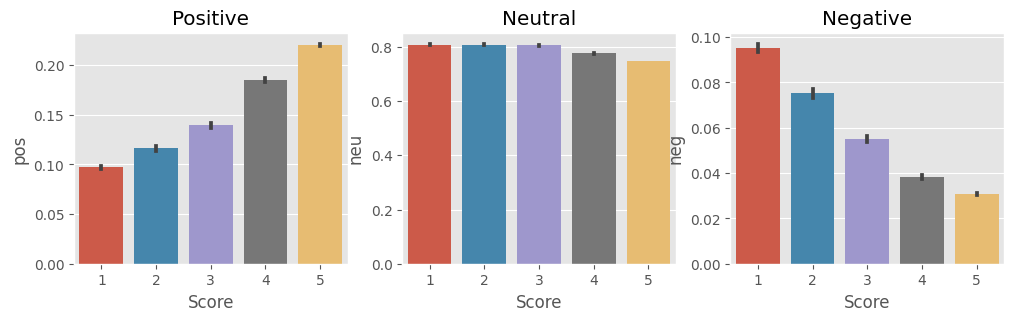

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot (data=vaders, x='Score' , y='pos', ax=axs[0])
sns.barplot (data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot (data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained (MODEL)
model = AutoModelForSequenceClassification.from_pretrained (MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}


print(scores_dict)


{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687476, 'roberta_pos': 0.002957372}


In [ ]:
def polarity_scores_roberta (example):
    encoded_text= tokenizer (example, return_tensors='pt')
    output = model (**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax (scores)
    scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm (df.iterrows(), total=len (df)):
    try:
        text = row[ 'Text']
        myid = row['Id' ]
        vader_result = sia.polarity_scores (text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename [f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print (f'Broke for id {myid}')

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
sent_pipeline('While the jewelry design is fifty fifty, the durability of some pieces leaves room for improvement')

[{'label': 'NEGATIVE', 'score': 0.997791051864624}]

In [ ]:
from bs4 import BeautifulSoup
import requests
from transformers import pipeline

# Replace 'your_website_url' with the actual URL of the product page
url = 'https://zevarhouse.com/product/24k-gold-coated-pair-of-gorgeous-karas/#reviews'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Replace 'div' and 'your-class-name' with the actual tag and class name
reviews = soup.find_all('div', class_='description')
print(reviews)
# Process the extracted reviews as needed
for review in reviews:
    text_to_analyze = review.text

    # Perform sentiment analysis using transformers pipeline
    sentiment_pipeline = pipeline('sentiment-analysis')
    sentiment_result = sentiment_pipeline(text_to_analyze)[0]

    print(f"Review: {text_to_analyze}")
    print(f"Sentiment from roberta: {sentiment_result['label']} ({sentiment_result['score']:.2f})")
    print("\n" + "=" * 50 + "\n")  # Separation line for better readability


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[<div class="description"><p>I’m obsessed with the delicate designs and affordable prices – definitely recommend!</p>
</div>, <div class="description"><p>Ordered a ring, and it fits like a dream. Happy customer!</p>
</div>, <div class="description"><p>The product is firmly packed.</p>
</div>, <div class="description"><p>I bought a bracelet for my friend, and she’s over the moon with it.</p>
</div>, <div class="description"><p>Bling, bling, and more bling – just what I needed!</p>
</div>, <div class="description"><p>You can never have enough jewelry, especially from here.</p>
</div>, <div class="description"><p>Attention to detail in their designs is impressive.</p>
</div>, <div class="description"><p>Good service.</p>
</div>, <div class="description"><p>Great experience from start to finish – will definitely be back.</p>
</div>, <div class="description"><p>No need to break the bank when you have this store around.</p>
</div>]


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Review: I’m obsessed with the delicate designs and affordable prices – definitely recommend!

Sentiment from roberta: POSITIVE (1.00)




No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Review: Ordered a ring, and it fits like a dream. Happy customer!

Sentiment from roberta: POSITIVE (1.00)




No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Review: The product is firmly packed.

Sentiment from roberta: POSITIVE (1.00)




No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Review: I bought a bracelet for my friend, and she’s over the moon with it.

Sentiment from roberta: POSITIVE (1.00)




No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Review: Bling, bling, and more bling – just what I needed!

Sentiment from roberta: POSITIVE (1.00)




No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Review: You can never have enough jewelry, especially from here.

Sentiment from roberta: POSITIVE (0.90)




No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Review: Attention to detail in their designs is impressive.

Sentiment from roberta: POSITIVE (1.00)




No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Review: Good service.

Sentiment from roberta: POSITIVE (1.00)




No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Review: Great experience from start to finish – will definitely be back.

Sentiment from roberta: POSITIVE (1.00)


Review: No need to break the bank when you have this store around.

Sentiment from roberta: NEGATIVE (0.55)


